# ÁLGEBRA LINEAL COMPUTACIONAL - TP2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects  as so
from sklearn.decomposition import PCA

## CANASTA BASICA

### PREPROCESAMIENTO DE LOS DATOS

##### CONSIGNA 1:

In [2]:
tabla_nutricional = pd.read_csv("tabla_nutricional.csv", delimiter = ";")
tabla_nutricional

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (mg),Ca (mg),Fe (mg),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Leche fluida entera,270.00,12.420,8.370,7.830,153.900,283.50,0.189,NaN,4.990,2.190,0.520,NaN
1,Leche entera en polvo,11.00,4.510,2.840,2.730,44.440,99.00,0.060,NaN,1.620,0.770,0.060,NaN
2,Yogurt,19.00,2.450,0.510,0.490,7.990,17.67,0.005,NaN,0.320,0.140,0.014,NaN
3,Queso crema,1.66,0.060,0.100,0.370,1.230,0.93,NaN,NaN,0.360,0.110,0.010,NaN
4,Queso cuartirolo,3.66,0.060,0.770,0.800,20.840,16.54,NaN,NaN,0.760,0.210,0.020,NaN
5,Queso rallar,1.66,0.060,0.550,0.450,20.420,15.78,NaN,NaN,0.360,0.110,0.008,NaN
6,Huevo,16.00,NaN,1.920,1.890,21.600,8.96,0.400,NaN,0.510,0.720,0.460,NaN
7,Asado,50.00,NaN,9.300,7.500,33.000,7.50,1.120,NaN,2.930,3.270,0.189,NaN
8,Paleta,15.00,NaN,3.000,1.500,9.900,1.80,0.340,NaN,0.880,0.980,0.056,NaN
9,Hueso c/carne,15.00,NaN,3.000,1.500,9.900,1.80,0.340,NaN,0.880,0.980,0.056,NaN


In [3]:
tabla_nutricional["Na (mg)"].sum()

3337.714

In [4]:
tabla_nutricional = tabla_nutricional.fillna(0)
tabla_nutricional["Na (mg)"] = tabla_nutricional["Na (mg)"] / 1000
tabla_nutricional.rename(columns = {"Na (mg)":"Na (gr)"}, inplace = True)
tabla_nutricional["Ca (mg)"] = tabla_nutricional["Ca (mg)"] / 1000
tabla_nutricional.rename(columns = {"Ca (mg)":"Ca (gr)"}, inplace = True)
tabla_nutricional["Fe (mg)"] = tabla_nutricional["Fe (mg)"] / 1000
tabla_nutricional.rename(columns = {"Fe (mg)":"Fe (gr)"}, inplace = True)
tabla_nutricional

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Leche fluida entera,270.00,12.420,8.370,7.830,0.153900,0.28350,0.000189,0.00,4.990,2.190,0.520,0.00
1,Leche entera en polvo,11.00,4.510,2.840,2.730,0.044440,0.09900,0.000060,0.00,1.620,0.770,0.060,0.00
2,Yogurt,19.00,2.450,0.510,0.490,0.007990,0.01767,0.000005,0.00,0.320,0.140,0.014,0.00
3,Queso crema,1.66,0.060,0.100,0.370,0.001230,0.00093,0.000000,0.00,0.360,0.110,0.010,0.00
4,Queso cuartirolo,3.66,0.060,0.770,0.800,0.020840,0.01654,0.000000,0.00,0.760,0.210,0.020,0.00
5,Queso rallar,1.66,0.060,0.550,0.450,0.020420,0.01578,0.000000,0.00,0.360,0.110,0.008,0.00
6,Huevo,16.00,0.000,1.920,1.890,0.021600,0.00896,0.000400,0.00,0.510,0.720,0.460,0.00
7,Asado,50.00,0.000,9.300,7.500,0.033000,0.00750,0.001120,0.00,2.930,3.270,0.189,0.00
8,Paleta,15.00,0.000,3.000,1.500,0.009900,0.00180,0.000340,0.00,0.880,0.980,0.056,0.00
9,Hueso c/carne,15.00,0.000,3.000,1.500,0.009900,0.00180,0.000340,0.00,0.880,0.980,0.056,0.00


##### CONSIGNA 2:

In [5]:
def cumple_margenes_de_ingesta(tabla_nutricional):
    cantidad = tabla_nutricional["HC (gr)"].sum() + tabla_nutricional["Proteinas (gr)"].sum() + tabla_nutricional["Grasas (gr)"].sum() + tabla_nutricional["Na (gr)"].sum() + tabla_nutricional["Ca (gr)"].sum() + tabla_nutricional["Fe (gr)"].sum() + tabla_nutricional["Azucares Libres (gr)"].sum() + tabla_nutricional["Fibra (gr)"].sum()
    porc_grasas = (tabla_nutricional["Grasas (gr)"].sum() * 100)/cantidad
    porc_AGS = (tabla_nutricional["AGS (gr)"].sum() * 100)/cantidad
    porc_azucar = (tabla_nutricional["Azucares Libres (gr)"].sum() * 100)/cantidad
    porc_proteinas = (tabla_nutricional["Proteinas (gr)"].sum() * 100)/cantidad
    porc_AGp = (tabla_nutricional["AG p (gr)"].sum() * 100)/cantidad
    if (porc_grasas > 30) or (porc_AGS > 10) or  (porc_azucar > 10) or (porc_proteinas < 10) or (tabla_nutricional["Na (gr)"].sum() > 5) or (tabla_nutricional["Fibra (gr)"].sum() < 20) or (porc_AGp > 11):
        print("FALSO")
    else:
        print("VERDADERO")

In [6]:
cumple_margenes_de_ingesta(tabla_nutricional)

VERDADERO


### ANALISIS EN COMPONENTES PRINCIPALES

##### CONSIGNA 3:

Como nos piden que utilicemos el valor nutricional, vamos a eliminar las columna de las cantidades y vamos a indexar la de alimentos para que sean todos numeros y poder hacer el analisis

In [7]:
tabla_nutricional_PCA = tabla_nutricional

In [8]:
tabla_nutricional_PCA = tabla_nutricional.set_index('Alimento')
tabla_nutricional_PCA = tabla_nutricional_PCA.drop("Cantidad (gr/ml)",  axis = 1)

In [9]:
tabla_nutricional_PCA

,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
Alimento,,,,,,,,,,,
Leche fluida entera,12.420,8.370,7.830,0.153900,0.28350,0.000189,0.00,4.990,2.190,0.520,0.00
Leche entera en polvo,4.510,2.840,2.730,0.044440,0.09900,0.000060,0.00,1.620,0.770,0.060,0.00
Yogurt,2.450,0.510,0.490,0.007990,0.01767,0.000005,0.00,0.320,0.140,0.014,0.00
Queso crema,0.060,0.100,0.370,0.001230,0.00093,0.000000,0.00,0.360,0.110,0.010,0.00
Queso cuartirolo,0.060,0.770,0.800,0.020840,0.01654,0.000000,0.00,0.760,0.210,0.020,0.00
Queso rallar,0.060,0.550,0.450,0.020420,0.01578,0.000000,0.00,0.360,0.110,0.008,0.00
Huevo,0.000,1.920,1.890,0.021600,0.00896,0.000400,0.00,0.510,0.720,0.460,0.00
Asado,0.000,9.300,7.500,0.033000,0.00750,0.001120,0.00,2.930,3.270,0.189,0.00
Paleta,0.000,3.000,1.500,0.009900,0.00180,0.000340,0.00,0.880,0.980,0.056,0.00


Ahora, calculando autovalores y sus autovectores asociados, vamos a analizar componentes principales para ver cuantos son necesarios para explicar la mayor parte de los datos. Tambien hacemos un grafico para poder visualizarlo mejor

Con 1 componentes principales, se explica el 58.308360246323055 % de los datos
Con 2 componentes principales, se explica el 73.55139885288928 % de los datos
Con 3 componentes principales, se explica el 88.2674769973896 % de los datos
Con 4 componentes principales, se explica el 95.41668268143843 % de los datos
Con 5 componentes principales, se explica el 97.24984588550511 % de los datos
Con 6 componentes principales, se explica el 98.13321456621946 % de los datos
Con 7 componentes principales, se explica el 98.83824964763241 % de los datos
Con 8 componentes principales, se explica el 99.46182392323986 % de los datos
Con 9 componentes principales, se explica el 99.9649482071063 % de los datos
Con 10 componentes principales, se explica el 99.99930586920716 % de los datos
Con 11 componentes principales, se explica el 99.99999999999997 % de los datos


C:\Users\bau\Nueva carpeta\anaconda\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


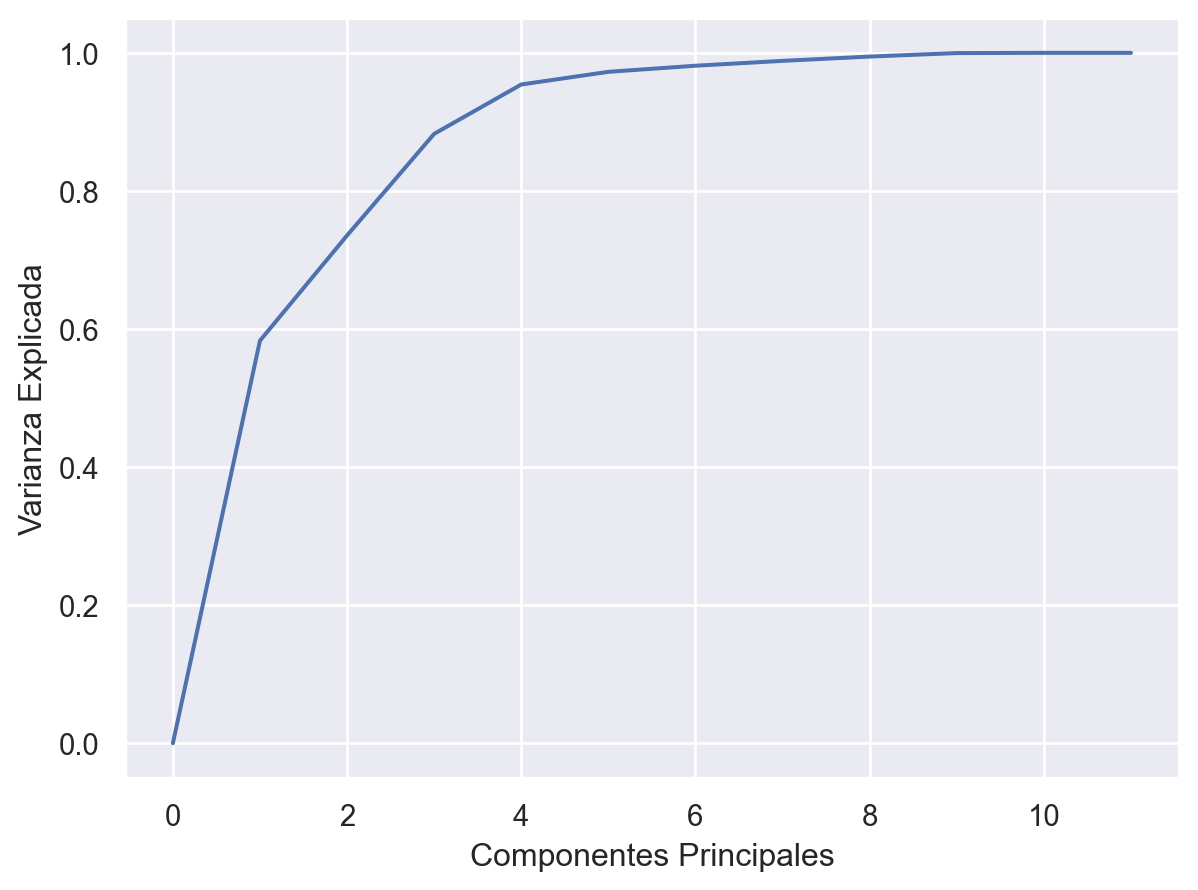

In [10]:
[U, S, Vh] = np.linalg.svd(tabla_nutricional_PCA)
tot = S.sum()
var_exp = [0]
a = 0
for i in range (0,len(S)):
    a += S[i]/tot
    var_exp.append(a)
    print("Con", i+1, "componentes principales, se explica el", var_exp[i+1] * 100, "% de los datos")
exp = {"Componentes Principales": [0,1,2,3,4,5,6,7,8,9,10,11], "Varianza Explicada": var_exp}
(so.Plot(data = exp, x = "Componentes Principales", y = "Varianza Explicada").add(so.Line()))

Como pudimos ver, hasta los primeros 3 componentes principales va aumentando la varianza explicada significativamente, mientras que despues sigue aumentando pero mucho mas lento. Es por esto que vamos a tomar para el PCA 3 componentes principales que explican el 88% de los datos.

Ahora, vamos a realizar el PCA para tres componentes y luego graficamos cada alimento como un punto en ejes coordenados del nuevo espacio creado por los autovectores generadores del ACP. 

In [11]:
tabla_nutricional_PCAn = (tabla_nutricional_PCA - tabla_nutricional_PCA.mean()) / tabla_nutricional_PCA.std()
pca = PCA(n_components=3)
componentes_principales = pca.fit_transform(tabla_nutricional_PCAn)
df_pca = pd.DataFrame(data=componentes_principales, index=tabla_nutricional["Alimento"], columns=['Componente 1', 'Componente 2', "Componente 3"])
df_pca

,Componente 1,Componente 2,Componente 3
Alimento,,,
Leche fluida entera,3.082801,4.374555,6.277109
Leche entera en polvo,0.393040,1.159744,2.085836
Yogurt,-0.709747,-0.163666,0.283687
Queso crema,-0.899872,-0.203441,0.024696
Queso cuartirolo,-0.649790,0.112549,0.448353
Queso rallar,-0.765474,-0.149925,0.300232
Huevo,-0.320341,0.312671,0.067156
Asado,1.684799,2.871787,0.730901
Paleta,-0.186120,0.461131,0.180902


Para hacer el grafico vamos a usar la componente 1 y la componente 2 que son las que explican la mayor parte de los datos

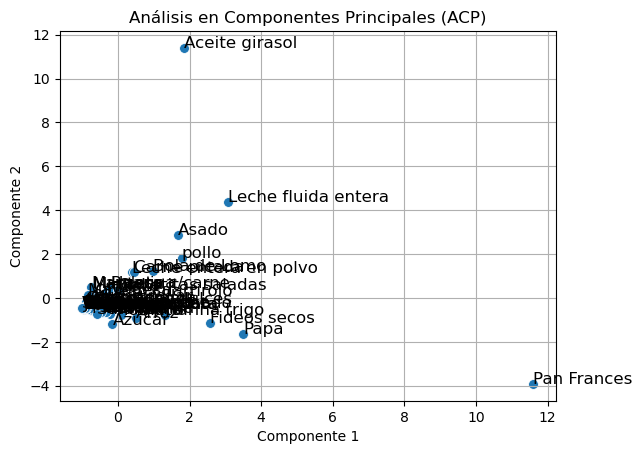

In [12]:
# Graficar los resultados
sns.scatterplot(x='Componente 1', y='Componente 2', data=df_pca, s=50)

# Añadir etiquetas a los puntos
for i, txt in enumerate(df_pca.index):
    plt.annotate(txt, (df_pca.iloc[i, 0], df_pca.iloc[i, 1]), fontsize=12)

plt.title('Análisis en Componentes Principales (ACP)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.show()

Viendo el grafico, podemos observar que la mayoria de los alimentos forman parte de un unico cluster, pero que hay unos pocos alimentos como el Pan Frances y el Aceite de girasol que estan lejos de este cluster como si fueran outliers. 

Lo que podemos interpretar es que los alimentos que forman parte del cluster tienen perfiles nutricionales muy similares entre si y comparten características comunes en cuanto a sus valores de proteínas, azúcares, grasas, sodio, calcio, hierro, fibra, etc. En cambio los alimentos que estan lejos del cluster tienen perfiles nutricionales diferentes a los demas. Estos alimentos pueden tener una cantidad significativamente mayor o menor de uno o más nutrientes, lo que los separa de los otros en el espacio de componentes principales.

## AUMENTOS DE PRECIOS

##### CONSIGNA 4:

In [13]:
precios=pd.read_csv("consumidores_libres.csv", delimiter = ";")

In [14]:
df_pca_cons = df_pca.iloc[[33,27,44,30,28,6,26,0,56,16,17,19,31,15,22,21,11,7,8,10]]
df_pca_cons

,Componente 1,Componente 2,Componente 3
Alimento,,,
Aceite girasol,1.841840,11.393994,-3.961432
Arroz,0.509555,-0.924606,-0.381800
Azucar,-0.155987,-1.211078,-2.526255
Fideos secos,2.566252,-1.124842,-0.525220
Harina trigo,1.322718,-0.755742,-0.476568
Huevo,-0.320341,0.312671,0.067156
Pan Frances,11.600213,-3.919674,-1.335397
Leche fluida entera,3.082801,4.374555,6.277109
Yerba,-0.998378,-0.454018,-0.104873


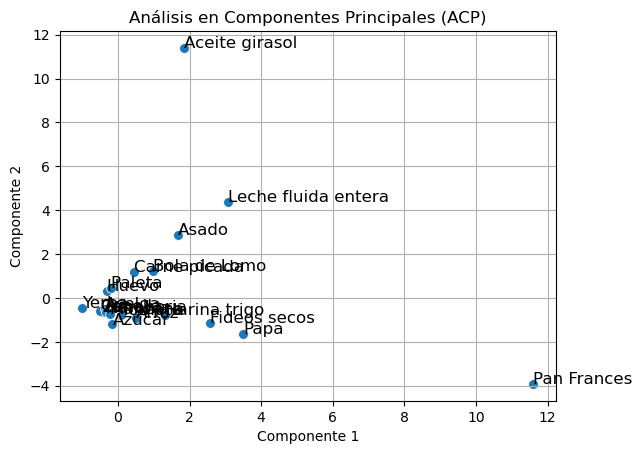

In [15]:
#plt.figure(figsize=(10, 8))
sns.scatterplot(x='Componente 1', y='Componente 2', data=df_pca_cons, s=50)

# Añadir etiquetas a los puntos
for i, txt in enumerate(df_pca_cons.index):
    plt.annotate(txt, (df_pca_cons.iloc[i, 0], df_pca_cons.iloc[i, 1]), fontsize=12)

plt.title('Análisis en Componentes Principales (ACP)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.show()

### Cuadrados minimos

##### CONSIGNA 5:

Creamos un dataframe que contenga el precio de cada nutriente usando el precio el precio de los alimentos de los cuales tenemos informacion y el porcentaje de cada nutriente en el.

In [16]:
tabla_nutricional = pd.read_csv("tabla_nutricional.csv", delimiter = ";")
tabla_nutricional = tabla_nutricional.fillna(0)
tabla_nutricional["Na (mg)"] = tabla_nutricional["Na (mg)"] / 1000
tabla_nutricional.rename(columns = {"Na (mg)":"Na (gr)"}, inplace = True)
tabla_nutricional["Ca (mg)"] = tabla_nutricional["Ca (mg)"] / 1000
tabla_nutricional.rename(columns = {"Ca (mg)":"Ca (gr)"}, inplace = True)
tabla_nutricional["Fe (mg)"] = tabla_nutricional["Fe (mg)"] / 1000
tabla_nutricional.rename(columns = {"Fe (mg)":"Fe (gr)"}, inplace = True)
tabla_nutricional
precios=pd.read_csv("consumidores_libres.csv", delimiter = ";")

In [17]:
#tabla_nutricional = tabla_nutricional.fillna(0)
tabla_nutricional_i=tabla_nutricional.set_index('Alimento')


In [19]:
tabla_nutricional_i.head()

,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
Alimento,,,,,,,,,,,,
Leche fluida entera,270.00,12.42,8.37,7.83,0.15390,0.28350,0.000189,0.0,4.99,2.19,0.520,0.0
Leche entera en polvo,11.00,4.51,2.84,2.73,0.04444,0.09900,0.000060,0.0,1.62,0.77,0.060,0.0
Yogurt,19.00,2.45,0.51,0.49,0.00799,0.01767,0.000005,0.0,0.32,0.14,0.014,0.0
Queso crema,1.66,0.06,0.10,0.37,0.00123,0.00093,0.000000,0.0,0.36,0.11,0.010,0.0
Queso cuartirolo,3.66,0.06,0.77,0.80,0.02084,0.01654,0.000000,0.0,0.76,0.21,0.020,0.0


Cambiamos el nombre de los indices para poder hacer un merge despues y que sea mas facil calcular todo.

In [22]:
productos = [
    'Leche fluida entera', 'LECHE c/VIT.FORT', 'Yogurt', 'Queso crema', 
    'Queso cuartirolo', 'Queso rallar', 'HUEVOS COLOR DOCENA', 'ASADO', 'PALETA', 
    'Hueso c/carne', 'CARNE PICADA COMUN', 'BOLA DE LOMO', 'Higado', 'pollo', 
    'pescado', 'ACELGA PAQUETE', 'ZANAHORIAS', 'TOMATE PERITA', 'Lechuga', 'CEBOLLA', 
    'Zapallo', 'MANZANA', 'NARANJA', 'Mandarina', 'pera', 'Banana', 
    'PAN FRESCO', 'ARROZ GRANO FINO', 'HARINA DE TRIGO', 'Harina maiz', 'FIDEOS GUISEROS', 
    'PAPA NEGRA', 'Batata', 'ACEITE COCINERO GIRASOL', 'Manteca', 'Margarina', 'Mayonesa', 
    'Mortadela', 'Paleta cocida', 'Galletitas saladas', 'Galletitas dulces', 
    'Dulce de leche', 'Mermelada', 'Dulce de batata', 'AZUCAR LEDESMA', 'Gaseosa', 
    'Jugo conc.', 'Arvejas en lata', 'Tomate envasado', 'Caldo conc.', 
    'Cerveza', 'Vino', 'Soda', 'Sal fina', 'Vina re', 'Cafe', 'YERBA TARAGUI'
]
tabla_nutricional_i.index = productos

In [45]:
#Calculamos el precio por gramo de cada alimento
for fecha in ["31/12/2023", "31/1/2024", "29/2/2024", "31/3/2024", "30/4/2024"]:
    precios[f"Precio por gr/ml ({fecha})"] = precios[fecha] / precios["Cantidad"]
precios_g = precios.drop(precios.columns[1:7], axis=1) #dataframe cpm los precios por gramo


In [46]:
precios.head()

,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,Precio por gr/ml (31/12/2023),Precio por gr/ml (31/1/2024),Precio por gr/ml (29/2/2024),Precio por gr/ml (31/3/2024),Precio por gr/ml (30/4/2024),Aumento (%)
0,ACEITE COCINERO GIRASOL,1500,2500.0,3100.0,3450.0,3600.0,3700.0,1.666667,2.066667,2.30,2.4,2.466667,48.000000
1,ARROZ GRANO FINO,1000,1650.0,2300.0,2800.0,3100.0,3550.0,1.650000,2.300000,2.80,3.1,3.550000,115.151515
2,AZUCAR LEDESMA,1000,1990.0,2050.0,2050.0,2100.0,2100.0,1.990000,2.050000,2.05,2.1,2.100000,5.527638
3,FIDEOS GUISEROS,500,1600.0,1990.0,2150.0,2200.0,2290.0,3.200000,3.980000,4.30,4.4,4.580000,43.125000
4,HARINA DE TRIGO,1000,950.0,1250.0,1350.0,1500.0,1690.0,0.950000,1.250000,1.35,1.5,1.690000,77.894737


In [25]:
df_merged = precios.merge(tabla_nutricional_i, left_on="PRODUCTOS", right_index=True)

In [26]:
df_merged.head()#juntamos los precios con la tabla de nutruicion

,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,Precio por gr/ml (31/12/2023),Precio por gr/ml (31/1/2024),Precio por gr/ml (29/2/2024),...,Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,ACEITE COCINERO GIRASOL,1500,2500.0,3100.0,3450.0,3600.0,3700.0,1.666667,2.066667,2.30,...,0.00,34.00,0.00000,0.00000,0.00000,0.0,3.710,7.820,20.980,0.00
1,ARROZ GRANO FINO,1000,1650.0,2300.0,2800.0,3100.0,3550.0,1.650000,2.300000,2.80,...,2.48,0.00,0.00144,0.00324,0.00025,0.0,0.000,0.000,0.000,0.97
2,AZUCAR LEDESMA,1000,1990.0,2050.0,2050.0,2100.0,2100.0,1.990000,2.050000,2.05,...,0.00,0.00,0.00000,0.00000,0.00000,43.0,0.000,0.000,0.000,0.00
3,FIDEOS GUISEROS,500,1600.0,1990.0,2150.0,2200.0,2290.0,3.200000,3.980000,4.30,...,7.15,0.88,0.00392,0.01008,0.00240,0.0,0.126,0.104,0.362,1.34
4,HARINA DE TRIGO,1000,950.0,1250.0,1350.0,1500.0,1690.0,0.950000,1.250000,1.35,...,4.63,1.21,0.00450,0.00495,0.00068,0.0,0.190,0.110,0.510,1.44


In [27]:
#calculamos el precio por gramo de cada nutriente en cada alimento, en sus respectivas fechas
for fecha in ["31/12/2023", "31/1/2024", "29/2/2024", "31/3/2024", "30/4/2024"]:
    for nutriente in ["HC (gr)", "Proteinas (gr)", "Grasas (gr)"]:
       df_merged[f"Precio por gr de {nutriente} ({fecha})"] = (df_merged[nutriente]/df_merged["Cantidad (gr/ml)"])* df_merged[f"Precio por gr/ml ({fecha})"] 


# Seleccionar columnas relevantes
columnas_relevantes = ["PRODUCTOS", "Cantidad (gr/ml)", "HC (gr)", "Proteinas (gr)", "Grasas (gr)"] + [col for col in df_merged.columns if "Precio por gr de" in col]
preciosnutrientes = df_merged[columnas_relevantes]

preciosnutrientes

,PRODUCTOS,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Precio por gr de HC (gr) (31/12/2023),Precio por gr de Proteinas (gr) (31/12/2023),Precio por gr de Grasas (gr) (31/12/2023),Precio por gr de HC (gr) (31/1/2024),Precio por gr de Proteinas (gr) (31/1/2024),Precio por gr de Grasas (gr) (31/1/2024),Precio por gr de HC (gr) (29/2/2024),Precio por gr de Proteinas (gr) (29/2/2024),Precio por gr de Grasas (gr) (29/2/2024),Precio por gr de HC (gr) (31/3/2024),Precio por gr de Proteinas (gr) (31/3/2024),Precio por gr de Grasas (gr) (31/3/2024),Precio por gr de HC (gr) (30/4/2024),Precio por gr de Proteinas (gr) (30/4/2024),Precio por gr de Grasas (gr) (30/4/2024)
0,ACEITE COCINERO GIRASOL,34.0,0.00,0.00,34.00,0.000000,0.000000,1.666667,0.000000,0.000000,2.066667,0.000000,0.000000,2.300000,0.000000,0.000000,2.400000,0.000000,0.000000,2.466667
1,ARROZ GRANO FINO,36.0,28.51,2.48,0.00,1.306708,0.113667,0.000000,1.821472,0.158444,0.000000,2.217444,0.192889,0.000000,2.455028,0.213556,0.000000,2.811403,0.244556,0.000000
2,AZUCAR LEDESMA,43.0,43.00,0.00,0.00,1.990000,0.000000,0.000000,2.050000,0.000000,0.000000,2.050000,0.000000,0.000000,2.100000,0.000000,0.000000,2.100000,0.000000,0.000000
3,FIDEOS GUISEROS,56.0,40.65,7.15,0.88,2.322857,0.408571,0.050286,2.889054,0.508161,0.062543,3.121339,0.549018,0.067571,3.193929,0.561786,0.069143,3.324589,0.584768,0.071971
4,HARINA DE TRIGO,45.0,30.92,4.63,1.21,0.652756,0.097744,0.025544,0.858889,0.128611,0.033611,0.927600,0.138900,0.036300,1.030667,0.154333,0.040333,1.161218,0.173882,0.045442
5,HUEVOS COLOR DOCENA,16.0,0.00,1.92,1.89,0.000000,0.366667,0.360937,0.000000,0.433333,0.426563,0.000000,0.500000,0.492188,0.000000,0.566667,0.557812,0.000000,0.633333,0.623437
6,PAN FRESCO,234.0,140.40,23.40,0.00,0.990000,0.165000,0.000000,1.260000,0.210000,0.000000,1.320000,0.220000,0.000000,1.380000,0.230000,0.000000,1.380000,0.230000,0.000000
7,LECHE c/VIT.FORT,11.0,4.51,2.84,2.73,0.451000,0.284000,0.273000,0.496100,0.312400,0.300300,0.664200,0.418255,0.402055,0.774900,0.487964,0.469064,0.815900,0.513782,0.493882
8,YERBA TARAGUI,20.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,ZANAHORIAS,27.0,2.16,0.29,0.00,0.065600,0.008807,0.000000,0.079200,0.010633,0.000000,0.088000,0.011815,0.000000,0.088000,0.011815,0.000000,0.088000,0.011815,0.000000


Separamos en 3 dataframes por nutriente, cada uno con el precio del nutriente en el alimento que lo contenga 

In [30]:
precioHC=preciosnutrientes[[col for col in preciosnutrientes.columns if col.startswith("Precio por gr de HC")]]
precioHC=precioHC.drop([0,5,8,14,17,18,19,20])
precioG=preciosnutrientes[[col for col in preciosnutrientes.columns if col.startswith("Precio por gr de Grasas")]]
precioG=precioG.drop([1,2,6,8,9,11,12,13,14,15,16])
precioP=preciosnutrientes[[col for col in preciosnutrientes.columns if col.startswith("Precio por gr de Proteinas")]]
precioP=precioP.drop([0,2,8])

Preparamos fechas para poder graficar y calculas cuadrados minimos. Tomando [0,1,2,3,4] como cada uno de los 5 meses.

In [31]:
from datetime import datetime
fechas_ordinal=[0,1,2,3,4]
fechas_dt = [datetime.strptime(fecha, '%d/%m/%Y') for fecha in fechas]

Creamos una funcion que aplique cuadrados minimos para este caso particular.
Queremos resolver 
${\textup{A}^{t}\textup{A}x=\textup{A}^{t}y}$
Primero creamos la matriz ${A}$ de la forma ${n.5x2}$, siendo n la cantidad a los cuales les aplico cuadrados minimos. De esta forma:
\begin{pmatrix}
 1&0 \\ 
 1&1 \\ 
 1&2 \\ 
 1&3 \\ 
 1&4 \\ 
 .&. \\ 
 .&. \\ 
 .&. \\ 
 1&4
\end{pmatrix}{pmatrix}
1&4 
\en

La segunda columna contiene [0,1,2,3,4] de forma consecutiva n veces representando los meses.

Despues creamos ${y}$ ${n.5x1}$ donde en la columna iria el precio de cada uno de los productos en las 5 fechas.

Con esto ya prodriamos obtener la solucion ${x}$ la cual cotiene la ordenada al origen de la racta que buscamos y su pendiente. Luego con estos datos y los meses creamos la recta que esta a la menor distancia de todos los puntos. 

In [50]:
def cadrados(y,nprod):
    primera_columna = np.ones((nprod*5, 1))
    segunda_columna = np.tile([0, 1, 2, 3, 4], nprod).reshape(nprod*5, 1)
    A = np.hstack((primera_columna, segunda_columna))   
    y_nuevo = y.values[:,0].reshape(nprod, 1)
    for i in range(4):    
        y_nuevo = np.vstack([y_nuevo, y.values[:,[i+1]]])
    coef=np.linalg.solve(A.T @ A, A.T @ y_nuevo)
    linea= np.polyval(coef, fechas_ordinal)
    return [coef,linea]


Aplicamos la funcion a cada uno de los dataframes que contienen los precios de cada nutriente en diferentes alimentos.

In [51]:
coef_HC,linea_HC=cadrados(precioHC,len(precioHC))
coef_G,linea_G=cadrados(precioG,len(precioG))
coef_P,linea_P=cadrados(precioP,len(precioP))

Graficamos los puntos y la recta de cuadrados minimos.

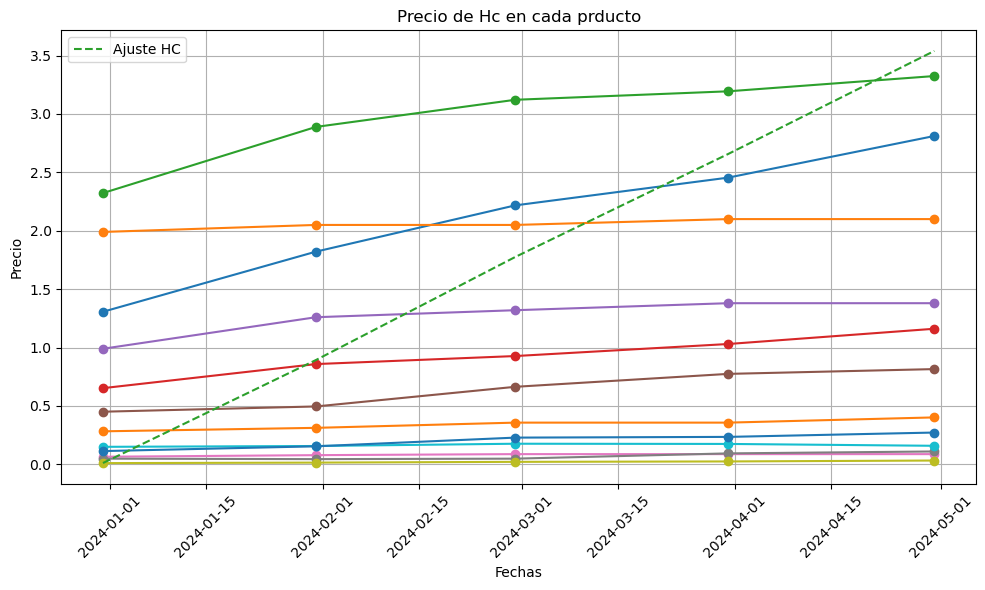

In [54]:

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los datos originales
plt.plot(fechas_dt , precioHC.T, marker='o')
# Graficar las líneas con coeficientes específicos
plt.plot(fechas_dt , linea_HC, label='Ajuste HC', linestyle='--')

plt.title('Precio de Hc en cada prducto')
plt.xlabel("Fechas")
plt.ylabel('Precio') 
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

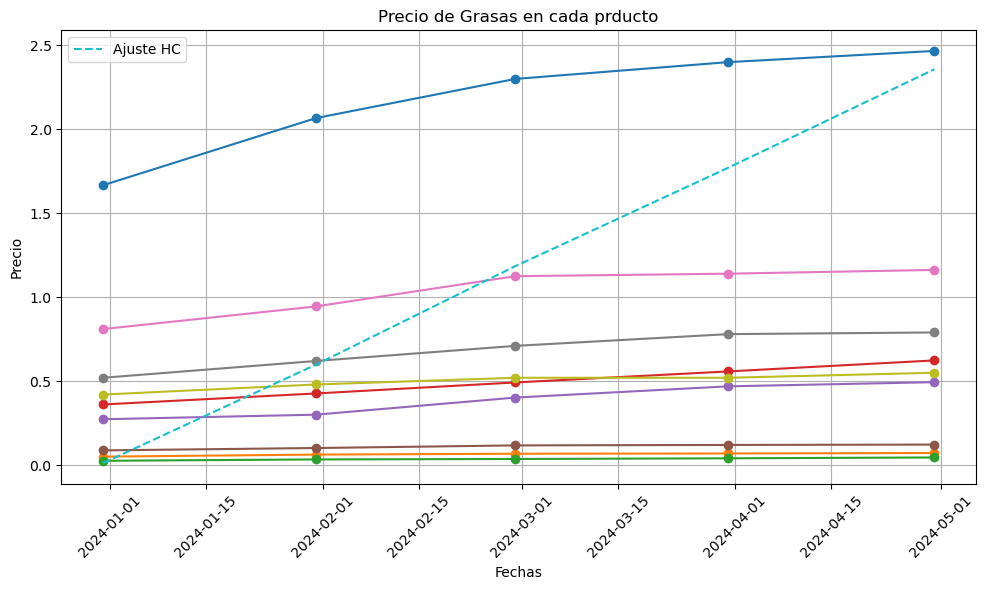

In [55]:

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los datos originales
plt.plot(fechas_dt , precioG.T, marker='o')
# Graficar las líneas con coeficientes específicos
plt.plot(fechas_dt , linea_G, label='Ajuste HC', linestyle='--')

plt.title('Precio de Grasas en cada prducto')
plt.xlabel("Fechas")
plt.ylabel('Precio') 
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

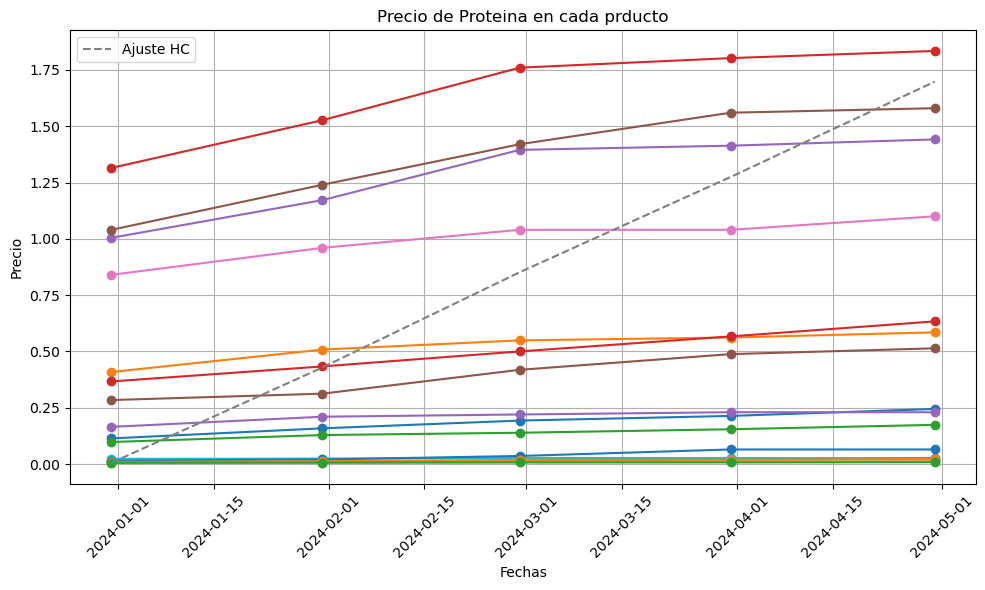

In [56]:

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los datos originales
plt.plot(fechas_dt , precioP.T, marker='o')
# Graficar las líneas con coeficientes específicos
plt.plot(fechas_dt , linea_P, label='Ajuste HC', linestyle='--')

plt.title('Precio de Proteina en cada prducto')
plt.xlabel("Fechas")
plt.ylabel('Precio') 
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
resultados=[]
fechas_interes = ['31/12/2023', '31/1/2024', '29/2/2024', '31/3/2024', '30/4/2024']
# Calcular aumentos para cada producto y nutriente
for index, row in precios_g.iterrows():
    producto = row['PRODUCTOS']
    inicio = row['Precio por gr/ml (31/12/2023)']
    final = row['Precio por gr/ml (30/4/2024)']
    aumento = ((final - inicio) / inicio) * 100
    resultados.append({
                'Producto': producto,
                'Aumento (%)': aumento
            })

# Crear dataframe con los resultados
Aumentos = pd.DataFrame(resultados)
Aumentos


,Producto,Aumento (%)
0,ACEITE COCINERO GIRASOL,48.000000
1,ARROZ GRANO FINO,115.151515
2,AZUCAR LEDESMA,5.527638
3,FIDEOS GUISEROS,43.125000
4,HARINA DE TRIGO,77.894737
5,HUEVOS COLOR DOCENA,72.727273
6,PAN FRESCO,39.393939
7,LECHE c/VIT.FORT,80.909091
8,YERBA TARAGUI,96.428571
9,ZANAHORIAS,34.146341


##### CONSIGNA 6:

Sepramos en rubros

In [38]:
indices_carne= ["BOLA DE LOMO","ASADO","PALETA","CARNE PICADA COMUN"]
indices_fryver=["ZANAHORIAS","TOMATE PERITA","MANZANA","NARANJA","ACELGA PAQUETE","PAPA NEGRA","CEBOLLA"]
indices_almacen=["YERBA TARAGUI","LECHE c/VIT.FORT",	"PAN FRESCO","HUEVOS COLOR DOCENA","HARINA DE TRIGO","FIDEOS GUISEROS","AZUCAR LEDESMA","ARROZ GRANO FINO","ACEITE COCINERO GIRASOL"]	
carnes = Aumentos[Aumentos["Producto"].isin(indices_carne)]
frutasyverduras = Aumentos[Aumentos["Producto"].isin(indices_fryver)]
almacen = Aumentos[Aumentos["Producto"].isin(indices_almacen)]

In [39]:
print("Promedio aumento :",Aumentos["Aumento (%)"].mean())
print("Promedio aumento carne:",carnes["Aumento (%)"].mean())
print("Promedio aumento frutas y verduras:",frutasyverduras["Aumento (%)"].mean())
print("Promedio aumento almacen:",almacen["Aumento (%)"].mean())

Promedio aumento : 85.72481672874608
Promedio aumento carne: 41.47752635655861
Promedio aumento frutas y verduras: 126.92665922390242
Promedio aumento almacen: 64.35086273816108


Vemos que el aumento total es de 85.72481672874608% en todos los productos en promedio y que el rubro de la carne fue el que menos aumento.

In [41]:
#creamos un df con los precio y los aumentos para poder ver cuanto afecta esto a la tabla de nutricion
precios_a=precios
precios_a["Aumento (%)"]=Aumentos["Aumento (%)"]
precios_a=precios_a.set_index("PRODUCTOS")
tabla_nutricional_a = tabla_nutricional.set_index('Alimento')


Aplicamos el aumemto de la carne para ver si aun asi se cumplen las metas de la OMS restandole su aumento a la cantidad de cada producto carnico para ver como afecta esto a los nutrientes que aportan.

In [42]:
for carne in ["BOLA DE LOMO", "ASADO", "PALETA", "CARNE PICADA COMUN"]:
    if carne == "BOLA DE LOMO":
        porcentaje = precios_a.loc[carne, "Aumento (%)"] / 100
        for col in tabla_nutricional_i.columns:
            tabla_nutricional_i.loc[carne, col] = tabla_nutricional_i.loc[carne, col] * (1 - porcentaje)

    if carne == "ASADO":
        porcentaje = precios_a.loc[carne, "Aumento (%)"] / 100
        for col in tabla_nutricional_i.columns:
            tabla_nutricional_i.loc[carne, col] = tabla_nutricional_i.loc[carne, col] * (1 - porcentaje)

    if carne == "PALETA":
        porcentaje = precios_a.loc[carne, "Aumento (%)"] / 100
        for col in tabla_nutricional_i.columns:
            tabla_nutricional_i.loc[carne, col] = tabla_nutricional_i.loc[carne, col] * (1 - porcentaje)

    if carne == "CARNE PICADA COMUN":
        porcentaje = precios_a.loc[carne, "Aumento (%)"] / 100
        for col in tabla_nutricional_i.columns:
            tabla_nutricional_i.loc[carne, col] = tabla_nutricional_i.loc[carne, col] * (1 - porcentaje)

cumple_margenes_de_ingesta(tabla_nutricional_i)

VERDADERO


## REEMPLAZO DIETARIO

##### CONSIGNA 7:

Para realizar el reemplazo dietario primero vamos a calcular cuantos gramos de proteinas y de grasas hay en un gramo de carne. Luego, calculamos cuanto fue el aumento en gramos de carne.

In [43]:
carnes

,Producto,Aumento (%)
17,BOLA DE LOMO,39.516129
18,ASADO,43.518519
19,PALETA,51.923077
20,CARNE PICADA COMUN,30.952381


El total de carne que se consumia era 126 gr, ahora se consume 18.5% menos, osea 23.31 gr menos:

In [427]:
print("Se pierde:",(carnes["Proteinas (gr)"].sum() * 18.5)/100, "gr de proteinas", (carnes["Grasas (gr)"].sum() * 18.5)/100,"gr de grasas")

Se pierde: 4.608350000000001 gr de proteinas 2.2533 gr de grasas


In [501]:
print ("En un gramo de carne hay :",carnes["Proteinas (gr)"].sum()/126,"gr de proteinas y", carnes["Grasas (gr)"].sum()/126, "gr de grasas")

En un gramo de carne hay : 0.19769841269841273 gr de proteinas y 0.09666666666666666 gr de grasas


In [505]:
precio_inicial_carnes = 4200 + 5200 + 5400 + 6200
precio_final_carnes = 5500 + 7900 + 7750 + 8650
print("El 50% del aumento de la carne es:",((precio_final_carnes -  precio_inicial_carnes)/2)/1000, "pesos por gramo de carne")

El 50% del aumento de la carne es: 4.4 pesos por gramo de carne


Ahora, vamos a mirar la tabla de precios y la tabla nutricional, para asi ver cuales son los mejores alimentos para poder llegar a reemplazar la carne

In [433]:
precios

,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,Precio por gr/ml (31/12/2023),Precio por gr/ml (31/1/2024),Precio por gr/ml (29/2/2024),Precio por gr/ml (31/3/2024),Precio por gr/ml (30/4/2024)
0,ACEITE COCINERO GIRASOL,1500,2500.0,3100.0,3450.0,3600.0,3700.0,1.666667,2.066667,2.300000,2.400000,2.466667
1,ARROZ GRANO FINO,1000,1650.0,2300.0,2800.0,3100.0,3550.0,1.650000,2.300000,2.800000,3.100000,3.550000
2,AZUCAR LEDESMA,1000,1990.0,2050.0,2050.0,2100.0,2100.0,1.990000,2.050000,2.050000,2.100000,2.100000
3,FIDEOS GUISEROS,500,1600.0,1990.0,2150.0,2200.0,2290.0,3.200000,3.980000,4.300000,4.400000,4.580000
4,HARINA DE TRIGO,1000,950.0,1250.0,1350.0,1500.0,1690.0,0.950000,1.250000,1.350000,1.500000,1.690000
5,HUEVOS COLOR DOCENA,720,2200.0,2600.0,3000.0,3400.0,3800.0,3.055556,3.611111,4.166667,4.722222,5.277778
6,PAN FRESCO,1000,1650.0,2100.0,2200.0,2300.0,2300.0,1.650000,2.100000,2.200000,2.300000,2.300000
7,LECHE c/VIT.FORT,1000,1100.0,1210.0,1620.0,1890.0,1990.0,1.100000,1.210000,1.620000,1.890000,1.990000
8,YERBA TARAGUI,1000,2800.0,3700.0,4600.0,4950.0,5500.0,2.800000,3.700000,4.600000,4.950000,5.500000
9,ZANAHORIAS,1000,820.0,990.0,1100.0,1100.0,1100.0,0.820000,0.990000,1.100000,1.100000,1.100000


Vemos la tabla nutricional de los alimentos que nos parecieron los mejores para reemplazar a la carne sin perder valor nutricional

In [438]:
tabla_nutricional.iloc[[0,26,30,28,6]]

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Leche fluida entera,270.0,12.42,8.37,7.83,0.15390,0.28350,0.000189,0.0,4.990,2.190,0.520,0.00
26,Pan Frances,234.0,140.40,23.40,0.00,0.31824,0.04446,0.007790,0.0,0.000,0.000,0.000,6.32
30,Fideos secos,56.0,40.65,7.15,0.88,0.00392,0.01008,0.002400,0.0,0.126,0.104,0.362,1.34
28,Harina trigo,45.0,30.92,4.63,1.21,0.00450,0.00495,0.000680,0.0,0.190,0.110,0.510,1.44
6,Huevo,16.0,0.00,1.92,1.89,0.02160,0.00896,0.000400,0.0,0.510,0.720,0.460,0.00


In [439]:
print("Pan:", 23.40/234, "de proteinas y", 0, "de grasas")
print("Fideos:", 7.15/56, "de proteinas y", 0.88/56, "de grasas")
print("Harina de trigo:", 4.63/45, "de proteinas y", 1.21/45, "de grasas")
print("Huevos:", 1.92/16, "de proteinas y", 1.89/16, "de grasas")

Pan: 0.09999999999999999 de proteinas y 0 de grasas
Fideos: 0.12767857142857145 de proteinas y 0.015714285714285715 de grasas
Harina de trigo: 0.10288888888888889 de proteinas y 0.02688888888888889 de grasas
Huevos: 0.12 de proteinas y 0.118125 de grasas


Por lo que pude ver, la harina y los huevos son las mejores opciones para obtener una cantidad parecida de proteinas y grasas por gramo a las de la carne

Busco dos alimentos que tengan un precio por gramo menor a 4.4 pesos el gramo:

In [443]:
print("harina de trigo:", 1690/1000, "pesos por gramo")
print("Huevos:", 3800/720, "pesos por gramo")

harina de trigo: 1.69 pesos por gramo
Huevos: 5.277777777777778 pesos por gramo


Como los huevos son mas caros, trato de tomar menos cantidad (tomo medio gramo de huevos por gramo de carne y me da bien) 

In [447]:
print("Tomando medio gramo de huevos:",(3800/720) * 0.51 + 1.69)

Tomando medio gramo de huevos: 4.381666666666667


El precio ya da bien, las proteinas y las grasas:

In [451]:
print("Proteinas:", 4.63/45 + (1.92/16)*0.51, "y grasas:", 1.21/45 + (1.89/16)*0.51)

Proteinas: 0.1640888888888889 y grasas: 0.08713263888888889


Esta muy cerca de los valores a los que queriamos llegar para reemplazar la carne, que son 0.19 de proteinas y 0.10 de grasas por gramo

Asi que ahora vamos a hacer el reemplazo en la dieta, cambiando por cada gramo de carne, un gramo de harina y medio de huevo. Vamos a eliminar las observaciones de la carne picada, el asado, la bola de lomo y la paleta y vamos a agregar una de carne con la carne reducida en un 18.5%. Ademas agregamos 23.31 gramos de harina de trigo y 11.655 gramos de huevos para hacer el reemplazo dietario.

In [487]:
reemplazo_dietario_agr = pd.DataFrame({"Alimento":["Huevos", "Harina de Trigo", "Carne"], "Cantidad (gr/ml)":[11.655,23.31,102.69], "HC (gr)":[0,16.01656,0], "Proteinas (gr)":[1.3986,2.39834,20.291544], "Grasas (gr)":[1.376746875,0.627039,9.930123], "Na (gr)":[0.016,0.02331,0.0669441], "Ca (gr)":[0.00633,0.0025641,0.01105], "Fe (gr)":[0.0003,0.00035,0.02641], "Azucares Libres (gr)":[0,0,0],"AGS (gr)":[0.3715,0.09842,6.015285],"AGNI (gr)":[0.524475,0.05698,6.699952], "AG p (gr)":[0.335,0.26418,0.38716269],"Fibra (gr)":[0,0.74592,0]})
reemplazo_dietario_agr

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Huevos,11.655,0.00000,1.398600,1.376747,0.016000,0.006330,0.00030,0,0.371500,0.524475,0.335000,0.00000
1,Harina de Trigo,23.310,16.01656,2.398340,0.627039,0.023310,0.002564,0.00035,0,0.098420,0.056980,0.264180,0.74592
2,Carne,102.690,0.00000,20.291544,9.930123,0.066944,0.011050,0.02641,0,6.015285,6.699952,0.387163,0.00000


In [496]:
reemplazo_dietario = pd.concat([tabla_nutricional, reemplazo_dietario_agr], ignore_index=True)
reemplazo_dietario = reemplazo_dietario.drop([10, 8,7,11]).reset_index()
reemplazo_dietario

,index,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,0,Leche fluida entera,270.000,12.42000,8.370000,7.830000,0.153900,0.283500,0.000189,0.00,4.990000,2.190000,0.520000,0.00000
1,1,Leche entera en polvo,11.000,4.51000,2.840000,2.730000,0.044440,0.099000,0.000060,0.00,1.620000,0.770000,0.060000,0.00000
2,2,Yogurt,19.000,2.45000,0.510000,0.490000,0.007990,0.017670,0.000005,0.00,0.320000,0.140000,0.014000,0.00000
3,3,Queso crema,1.660,0.06000,0.100000,0.370000,0.001230,0.000930,0.000000,0.00,0.360000,0.110000,0.010000,0.00000
4,4,Queso cuartirolo,3.660,0.06000,0.770000,0.800000,0.020840,0.016540,0.000000,0.00,0.760000,0.210000,0.020000,0.00000
5,5,Queso rallar,1.660,0.06000,0.550000,0.450000,0.020420,0.015780,0.000000,0.00,0.360000,0.110000,0.008000,0.00000
6,6,Huevo,16.000,0.00000,1.920000,1.890000,0.021600,0.008960,0.000400,0.00,0.510000,0.720000,0.460000,0.00000
7,9,Hueso c/carne,15.000,0.00000,3.000000,1.500000,0.009900,0.001800,0.000340,0.00,0.880000,0.980000,0.056000,0.00000
8,12,Higado,9.000,0.54000,1.770000,0.290000,0.007740,0.000360,0.000890,0.00,0.110000,0.043000,0.042000,0.00000
9,13,pollo,63.000,0.00000,13.230000,2.390000,0.045990,0.007560,0.000980,0.00,1.870000,2.720000,1.430000,0.00000


In [498]:
cumple_margenes_de_ingesta(reemplazo_dietario)

VERDADERO


##### CONSIGNA 8: